# Genetic Algorithm Applied to Learning the Dimensionless Number of Pressure Rise for Hydrogen Knudsen Compressor
-----------------------------------------------------By Qianhao Xiao（肖千豪）——————————————————————————

![jupyter](./Hydrogen_Knudsen_Compressor_P.png)

##  Import data from Comsol

In [3]:
np.random.seed(0)

#====================================空气压差40组=====================================
# dataset_path = './空气压差_40组.xlsx'
#====================================氢气压差40组=====================================
dataset_path = './氢气_P1P4压差_40组.xlsx'
#[微通道宽度，温差和长度]H	DeltaT	L
input_list = ['H', 'DeltaT', 'L','T0','lambda1','lambda2']
#压升
output_list = ['Deltap']
df = pd.read_excel(dataset_path)
inputs = df[input_list].to_numpy()
outputs = df[output_list].to_numpy().reshape(-1,)
#尺寸校正
inputs[:,[0,2,4,5]] = 1e-6 * inputs[:,[0,2,4,5]]
#长度和温度
dim_matrix = np.array(
    [
        [1., 0., 1.,0,1,1],
        [0., 1., 0.,1,0,0]
    ],
)

## Learning dimensionless numbers 

****************start find dimensionless*************


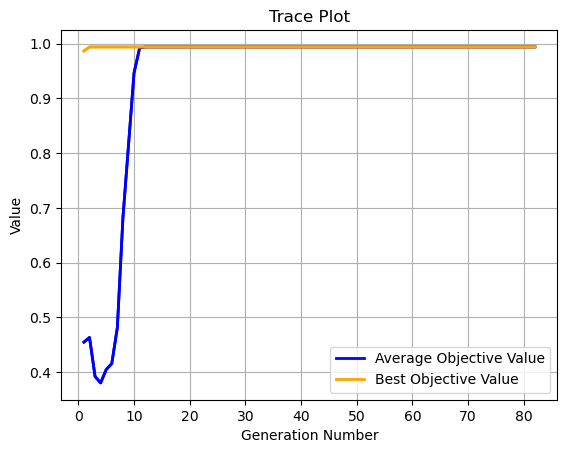

Execution time: 37.98899865150452 s
Evaluation number: 32800
The best objective value is: 0.9942518272357002
The best variables are: 
-1	0	0	0	-1	2	


In [4]:
dim = 1
deg = 1
def getcoef(inputs,outputs,GaOpt,deg,dim):
    theta = np.exp(np.log(inputs) @ np.reshape(GaOpt, [inputs.shape[1], dim]))
    poly = PolynomialFeatures(deg)
    X_poly = poly.fit_transform(theta.reshape(-1, 1))
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X_poly, outputs)
    y_pred = reg.predict(X_poly)
    r2 = r2_score(outputs, y_pred)
    print("R2=",r2)
    return reg.coef_
print('****************start find dimensionless*************')
print('****************Not all the codes have been published until the thesis is accepted*************')